In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [2]:
conn = psycopg2.connect("user=postgres password=Postgres2019! port=15432")
conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cursor = conn.cursor()

In [30]:
casos_covid = pd.read_sql_query('''
select * from casos_covid cc
join localizacao l on l.casos_covid_idcasos_covid = cc.idcasos_covid
''', con=conn)

casos_covid['date'] = pd.to_datetime(casos_covid['date'])
casos_covid['casos_covidcol'] = pd.to_datetime(casos_covid['casos_covidcol'])

casos_covid = casos_covid.rename(columns={'casos_covidcol': 'last_available_date'})
casos_covid = casos_covid.astype({
    'last_available_deaths':'int64',
    'last_available_death_rate':'float64'
    })

In [31]:
curitiba = casos_covid[casos_covid['city'] =='Curitiba']
recife = casos_covid[casos_covid['city'] =='Recife']
fortaleza = casos_covid[casos_covid['city'] =='Fortaleza']
maceio = casos_covid[casos_covid['city'] =='Maceió']
rio = casos_covid[casos_covid['city'] =='Rio de Janeiro']

<Figure size 432x288 with 0 Axes>

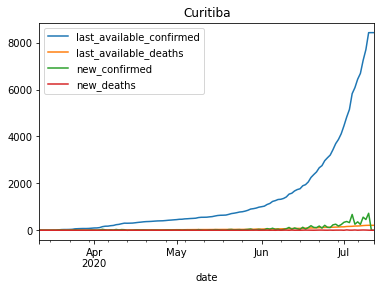

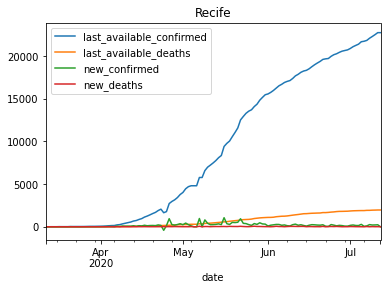

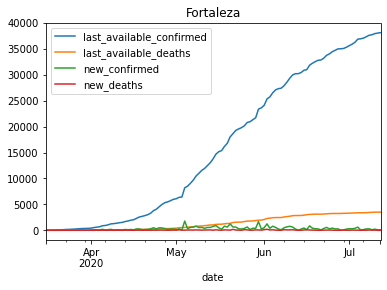

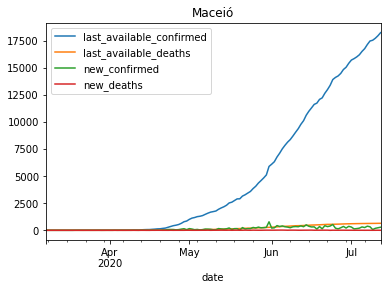

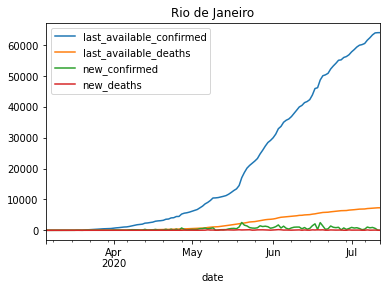

In [42]:
plt.figure();

curitiba.plot(x='date', y=['last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths'], title='Curitiba')
plt.savefig('imagens/curitiba-metricas.jpeg')

recife.plot(x='date', y=['last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths'], title='Recife')
plt.savefig('imagens/recife-metricas.jpeg')

fortaleza.plot(x='date', y=['last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths'], title='Fortaleza')
plt.savefig('imagens/fortaleza-metricas.jpeg')

maceio.plot(x='date', y=[ 'last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths'], title='Maceió')
plt.savefig('imagens/maceio-metricas.jpeg')

rio.plot(x='date', y=['last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths'], title='Rio de Janeiro')
plt.savefig('imagens/rio-metricas.jpeg')
